Atividade Prática Supervisionada - Entrega 2 - Correção e Covariância
# ***ONU - Análise de Objetivo de Desenvolvimento Sustentável***
### **Porcentagem da População com Acesso à Internet**

Integrantes:  
* Eduardo Mendes Vaz  
* João Lucas de Moraes Barros Cadorniga  

---

## **Introdução**  

Dentre os maiores desafios para prover educação de qualidade para a população é levar a preparação para as mais divesas áreas, principalmente em locais remotos de países subdesenvolvidos. Por exemplo, **como promover a educação em cidades ribeirinhas na Amazônia?**

No século XXI, muitos consideram a ***Internet como a resposta***. Se não é possível levar a escola para toda a população, o *ensino remoto* é uma possibilidade, descartando grandes infraestruturas. No entanto, outro problema aparece: **como garantir que essas populações acessem a Internet e frequentem as aulas?**

Portanto, muitos relacionam o desenvolvimento educacional de um país — e seu avanço em relação a respectiva ODS — com a porcentagem da população com acesso à Internet. Ademais, no mundo atual, pós-pandêmico, essa ideia se fez ainda mais relevante, já que o EAD se tornou uma urgência.

No entanto, **será que os países que investem em educação tiveram aumento no acesso à Internet?** Para entender mais sobre, analisamos o indicador `Porcentagem da População com Acesso à Internet`¹, comparando ao anterior (`Gasto em Educação, como % do PIB Anual`). A hipótese estudada, então, é da ligação entre os fatores, considerando a expansão das possibilidades educacionais.

***Observação***: consideramos apenas as porcentagens de anos pré-pandemia, já que o indicador foi desbalanceado pela condição externa, que forçou os países a melhorarem o acesso.  
  
¹ Fonte: [World Bank](https://databank.worldbank.org/reports.aspx?source=sustainable-development-goals-%28sdgs%29#)

## **Dados e Conclusões**  
Analisando apenas gráficamente, é possível perceber que **não há um padrão de crescimento claro entre o investimento em educação e o acesso à Internet**. Apesar de ambas porcentagens aumentarem ao longo dos anos em todos os países, ***os indicadores não seguem exatamente a mesma lógica***. Por exemplo, há diversos períodos na Noruega nos quais o investimento diminuiu, mas o acesso continuou a aumentar.  

No entanto, o Brasil foi o único país a apresentar tendências diferentes. As curvas de crescimento de ambos indicadores são razoavelmente semelhantes no período analisado.

Fazendo uma análise matemática da Covariância e da Correlação² dos dados em cada país, as observações visuais são confirmadas:

1. Brasil
    * Covariância: 10.595
    * **Correlação**: 0.942
1. Noruega: 
    * Covariância: 1.928
    * **Correlação**: 0.532
1. Costa do Marfim: 
    * Covariância: 2.900
    * **Correlação**: 0.677

O Brasil é o único país que apresentou uma forte correlação (~94%) entre o investimento em educação e o acesso à Internet, enquanto os outros estão abaixo dos 68%. O caso brasileiro pode ser considerado uma excessão no grupo, pelo comportamento não se replicar. É interessante notar que o país mais desenvolvido da lista, a Noruega, apresentou a menor correlação do grupo.  

Portanto, apesar de se observar pela covariância positiva que ambos fatores cresceram em todos os países, é observado que ***a hipótese levantada não é refletida no mundo real***. Apesar de, usualmente, o investimento — e o desenvolvimento — de um governo em educação e a porcentagem da população com acesso à Internet serem relacionados, eles apresentam **baixa geral correlação no estudo realizado**.  

²Cálculos completos disponíveis no final do PDF

## **Atualizações de Feedback no Gráfico Anterior:**  
* Título trocado para "Investimento em Educação", como pedido  
* Y-label trocado para "Investimento (% do PIB)", como pedido

---

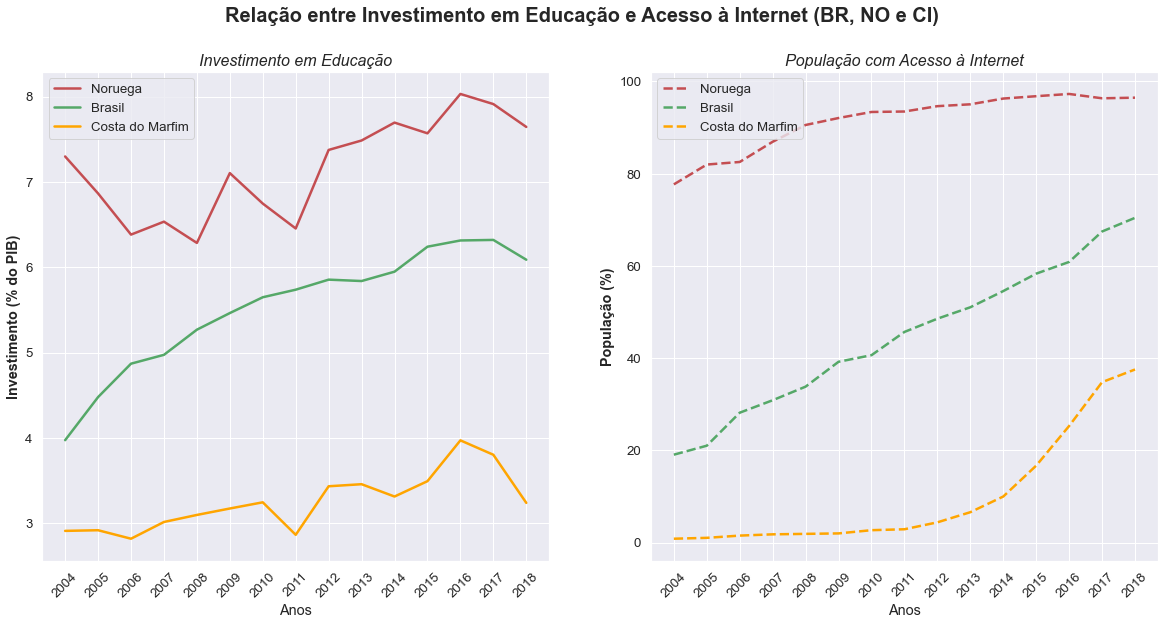

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('dados/API_SE.XPD.TOTL.GD.ZS_DS2_en_csv_v2_4411877.csv', skiprows=4)
df2 = pd.read_csv('dados/2013fc22-d306-4729-93ee-52ef4568f754_Data.csv')


anos = [str(i) for i in range(2004, 2019)]
anos2 = [str(n) + ' [YR' + str(n) + ']' for n in range(2004, 2019)]

anos.append('Country Name')
anos2.append('Country Name')



df_ = df[anos]
df2_ = df2[anos2]

df_ = df_.set_index('Country Name').transpose()
df2_ = df2_.set_index('Country Name').transpose()

sns.set_theme()
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
sns.axes_style("whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(20, 9))

sns.lineplot(y=df_['Norway'], x=list(range(2004, 2019)), ax=axes[0], color='r')
sns.lineplot(y=df_['Brazil'], x=list(range(2004, 2019)), ax=axes[0], color='g')
sns.lineplot(y=df_["Cote d'Ivoire"], x=list(range(2004, 2019)), ax=axes[0], color='orange')

sns.lineplot(y=df2_['Norway'], x=list(range(2004, 2019)), ax=axes[1], color='r', linestyle='dashed')
sns.lineplot(y=df2_['Brazil'], x=list(range(2004, 2019)), ax=axes[1], color='g', linestyle='dashed')
sns.lineplot(y=df2_["Cote d'Ivoire"], x=list(range(2004, 2019)), ax=axes[1], color='orange', linestyle='dashed')

axes[0].legend(['Noruega', 'Brasil', 'Costa do Marfim'], loc='upper left')
fig.suptitle('Relação entre Investimento em Educação e Acesso à Internet (BR, NO e CI)', fontsize=20, fontweight='bold')
axes[0].set_title('Investimento em Educação', fontsize=16, fontstyle='italic')
axes[1].set_title('População com Acesso à Internet', fontsize=16, fontstyle='italic')
axes[0].set_xlabel('Anos')
axes[1].set_xlabel('Anos')
axes[0].set_ylabel('Investimento (% do PIB)', fontweight='semibold')
axes[1].set_ylabel('População (%)', fontweight='semibold')
axes[0].set_xticks(list(range(2004, 2019)))
axes[0].set_xticklabels(list(range(2004, 2019)), rotation=45)
axes[1].set_xticks(list(range(2004, 2019)))
axes[1].set_xticklabels(list(range(2004, 2019)), rotation=45)

axes[1].legend(['Noruega', 'Brasil', 'Costa do Marfim'], loc='upper left')

plt.savefig('APS2.jpg')

plt.show()

In [10]:
df_ = df_[['Brazil', 'Norway', "Cote d'Ivoire"]]
df2_ = df2_[['Brazil', 'Norway', "Cote d'Ivoire"]]

df2_ = df2_.rename(index=dict(zip(anos2, anos)))

corr1 = df_['Brazil'].corr(df2_['Brazil'])
corr2 = df_['Norway'].corr(df2_['Norway'])
corr3 = df_["Cote d'Ivoire"].corr(df2_["Cote d'Ivoire"])
print(f'Correlação Brasil: {corr1 :.3f}')
print(f'Correlação Noruega: {corr2 :.3f}')
print(f'Correlação Costa do Marfim: {corr3 :.3f}')

cov1 = df_['Brazil'].cov(df2_['Brazil'])
cov2 = df_['Norway'].cov(df2_['Norway'])
cov3 = df_["Cote d'Ivoire"].cov(df2_["Cote d'Ivoire"])
print(f'Covariância Brasil: {cov1 :.3f}')
print(f'Covariância Noruega: {cov2 :.3f}')
print(f'Covariância Costa do Marfim: {cov3 :.3f}')

Correlação Brasil: 0.942
Correlação Noruega: 0.532
Correlação Costa do Marfim: 0.677
Covariância Brasil: 10.595
Covariância Noruega: 1.928
Covariância Costa do Marfim: 2.900
